# 라이브러리 & 데이터 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from matplotlib.colors import Normalize

import geopandas as gpd

# Windows 기본 한글 폰트로 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [28]:
# geopandas 설치
!pip install geopandas

전처리를 통해 merge_df.csv파일을 만들었습니다. 해당 데이터를 확인해보겠습니다.

In [2]:
# 데이터 불러오기
merge_df = pd.read_csv('merge_df.csv')

In [3]:
# 데이터 확인
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_state_customer,geolocation_state_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,SP,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,SP,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,SP,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,BA,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,GO,SP


In [4]:
# merge_df의 전체 컬럼 수 확인
print(f"총 컬럼 수: {merge_df.shape[1]}개")

# merge_df의 기본 정보 확인
merge_df.info()

# 컬럼 이름 전체 출력
print("\n컬럼 목록:")
print(merge_df.columns.tolist())

총 컬럼 수: 41개
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116036 entries, 0 to 116035
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116036 non-null  object 
 1   customer_id                    116036 non-null  object 
 2   order_status                   116036 non-null  object 
 3   order_purchase_timestamp       116036 non-null  object 
 4   order_approved_at              116022 non-null  object 
 5   order_delivered_carrier_date   115305 non-null  object 
 6   order_delivered_customer_date  114074 non-null  object 
 7   order_estimated_delivery_date  116036 non-null  object 
 8   order_item_id                  116036 non-null  float64
 9   product_id                     116036 non-null  object 
 10  seller_id                      116036 non-null  object 
 11  shipping_limit_date            116036 non-null  object 
 12  price             

#### **데이터 조회 결과**

merge_df에는 총 41개의 컬럼과 float64(14), int64(2), object(25)으로 이루어져 있습니다.

# EDA 시작
# 1. 카테고리별 제품 수 시각화

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\1840002936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


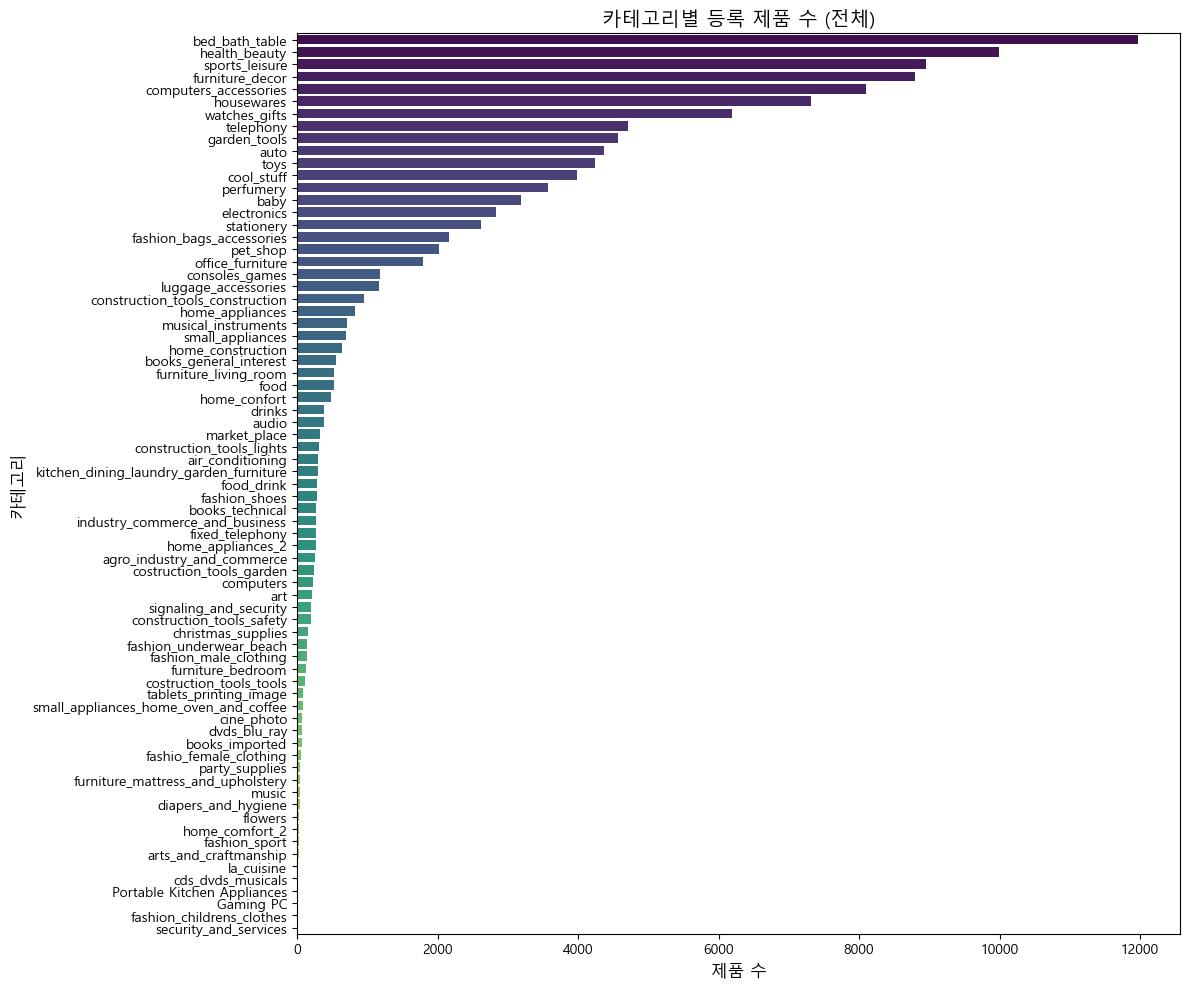

In [5]:
# 카테고리별 제품 수 집계
category_counts = merge_df['product_category_name_english'].value_counts().reset_index()
category_counts.columns = ['product_category_name_english', 'product_count']

# 수평 막대 그래프
plt.figure(figsize=(12, 10))  # 크기 조정은 필요시 늘려주세요
sns.barplot(
    data=category_counts, 
    y='product_category_name_english', 
    x='product_count', 
    palette='viridis'
)

plt.title("카테고리별 등록 제품 수 (전체)", fontsize=14)
plt.xlabel("제품 수", fontsize=12)
plt.ylabel("카테고리", fontsize=12)
plt.tight_layout()
plt.show()


온라인 마켓에서 어떤 상품 카테고리가 가장 많이 등록되어 있는지 파악하기 위한 기초 지표로    
제품 수가 많은 카테고리를 판매자가 많거나 수요가 많을 가능성이있고 반대로 제품 수가 적은 카테고리는 니치 마켓일 가능성이있습니다.     
향후 경쟁 강도 분석, 신규 셀러 유ㅡ망 카테고리 추천, 카테고리별 매출 분석 등의 기초 자료로 활용할 수 있다고 생각합니다.    
결과적으로 카테고리의 제품수가 상위권의 제품들에 많이 몰려있다는것을 알 수 있습니다.    
    
위에있는 정보로만 확인 했을때,    
상위에 위치한 카테고리는 등록 수가 많아 경쟁이 치열할 가능성이 높다 .   
하위에 위치한 카테고리는 등록수가 적더라도 특정 지역 수요나 충성도 높은 고객층이 있을 수 있다.    

카데고리 중 20개의 카테고리만 확인하여 상위값을 확인해보기 위해 시각화 하겠습니다.

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\3662923870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


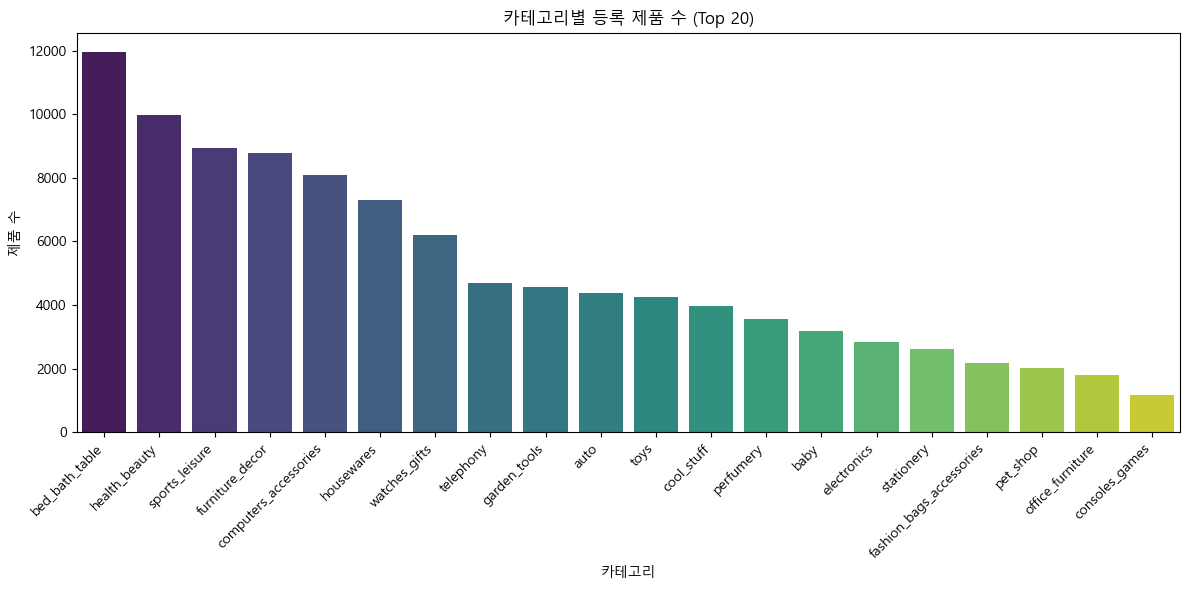

In [6]:
# 카테고리별 제품 수 집계
category_counts = merge_df['product_category_name_english'].value_counts().reset_index()
category_counts.columns = ['product_category_name_english', 'product_count']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_counts.head(20), 
    x='product_category_name_english', 
    y='product_count', 
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title("카테고리별 등록 제품 수 (Top 20)")
plt.xlabel("카테고리")
plt.ylabel("제품 수")
plt.tight_layout()
plt.show()

# 2. 카테고리별 단가 계산하기(평균, 중앙값)
## 평균값 단가

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\46291224.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


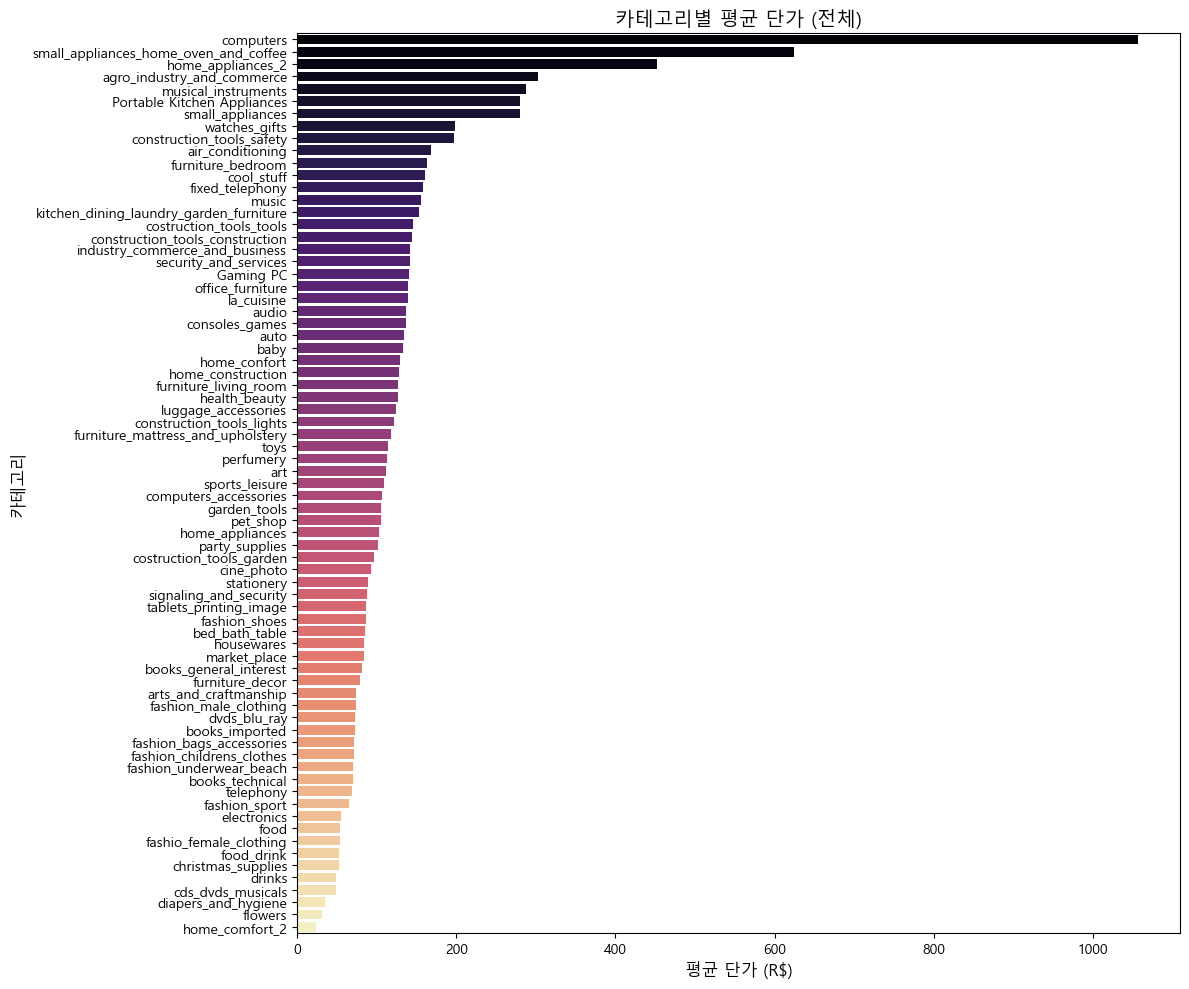

In [7]:
# 단가 계산 (order_item_id는 수량 의미)
merge_df['unit_price'] = merge_df['price'] / merge_df['order_item_id']

# 카테고리별 평균 단가 계산
category_unit_price = (
    merge_df
    .groupby('product_category_name_english')['unit_price']
    .mean()
    .reset_index()
    .sort_values(by='unit_price', ascending=False)
)

# 수평 막대 그래프
plt.figure(figsize=(12, 10))  # 필요시 세로 길이 조정
sns.barplot(
    data=category_unit_price, 
    y='product_category_name_english', 
    x='unit_price', 
    palette='magma'
)

plt.title("카테고리별 평균 단가 (전체)", fontsize=14)
plt.xlabel("평균 단가 (R$)", fontsize=12)
plt.ylabel("카테고리", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\4246697275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


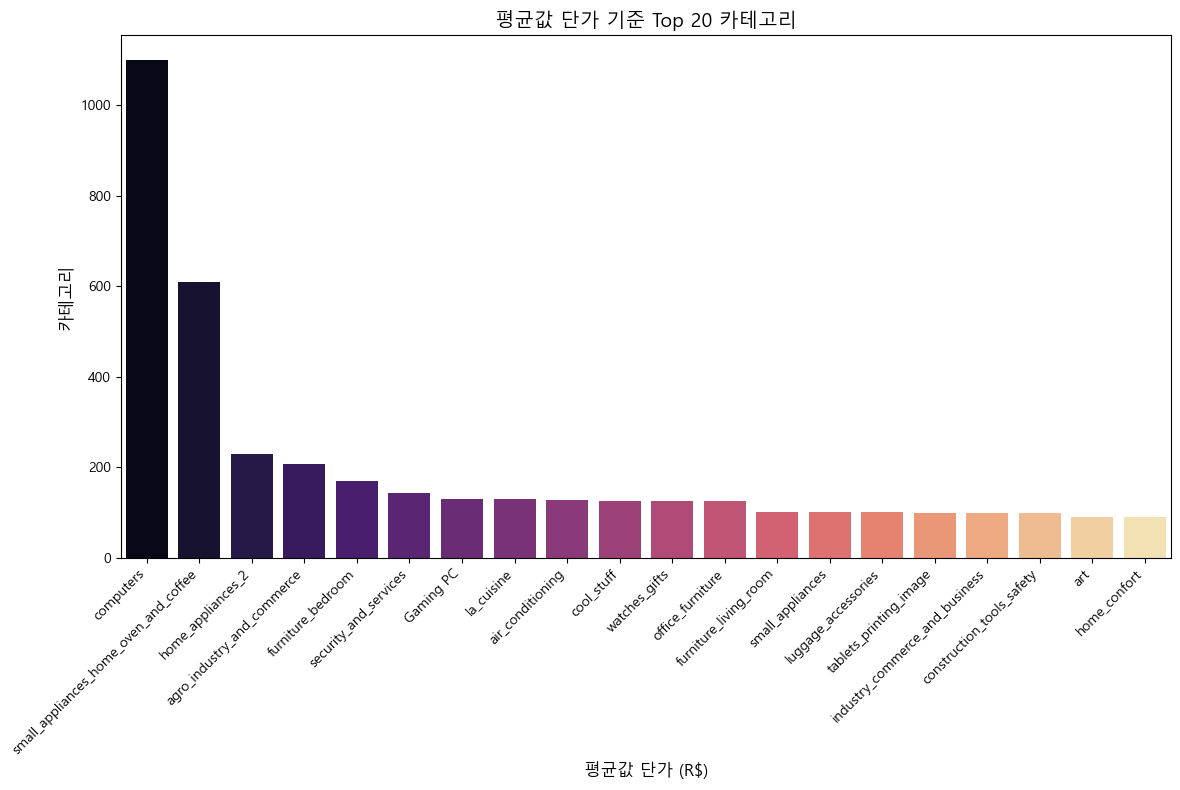

In [37]:
# 카테고리별 평균값 단가 계산 + 상위 20개 추출
category_unit_price_top20 = (
    merge_df
    .groupby('product_category_name_english')['unit_price']
    .mean()
    .reset_index()
    .sort_values(by='unit_price', ascending=False)
    .head(20)  # 상위 20개만
)

# 수평 막대그래프
plt.figure(figsize=(12, 8))
sns.barplot(
    data=category_median_price_top20,
    x='product_category_name_english',
    y='unit_price',
    palette='magma'
)

plt.title("평균값 단가 기준 Top 20 카테고리", fontsize=14)
plt.xlabel("평균값 단가 (R$)", fontsize=12)
plt.ylabel("카테고리", fontsize=12)

# x축 라벨을 대각선으로 회전
plt.xticks(rotation=45, ha='right', fontsize = 10)

plt.tight_layout()
plt.show()

어떤 카테고리의 상품이 평균적으로 고가인지 또는 저가인지를 확인하기 위해 분석한 자료입니다.    
셀러 입장에서는 진입 시 고가 중심 프리미엄 시장 또는 저가 중심 대중 시장을 선택하는 전략 판단에 활용할 수 있다고 생각합니다.

* 평균 단가가 높은 카테고리는 매출액 대비 수량이 적더라도 수익성이 높을 수 있음
* 단가가 낮은 카테고리는 수량 중심의 볼륨 전략이 필요할 수 있음

**위는 평균값으로 계산한 카테고리별 단가이기 때문에 극단치 영향을 받을 수 있으니 중앙값의 기준으로 그래프를 함께 확인해 보겠습니다.**

## 중앙값 단가

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\798237915.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


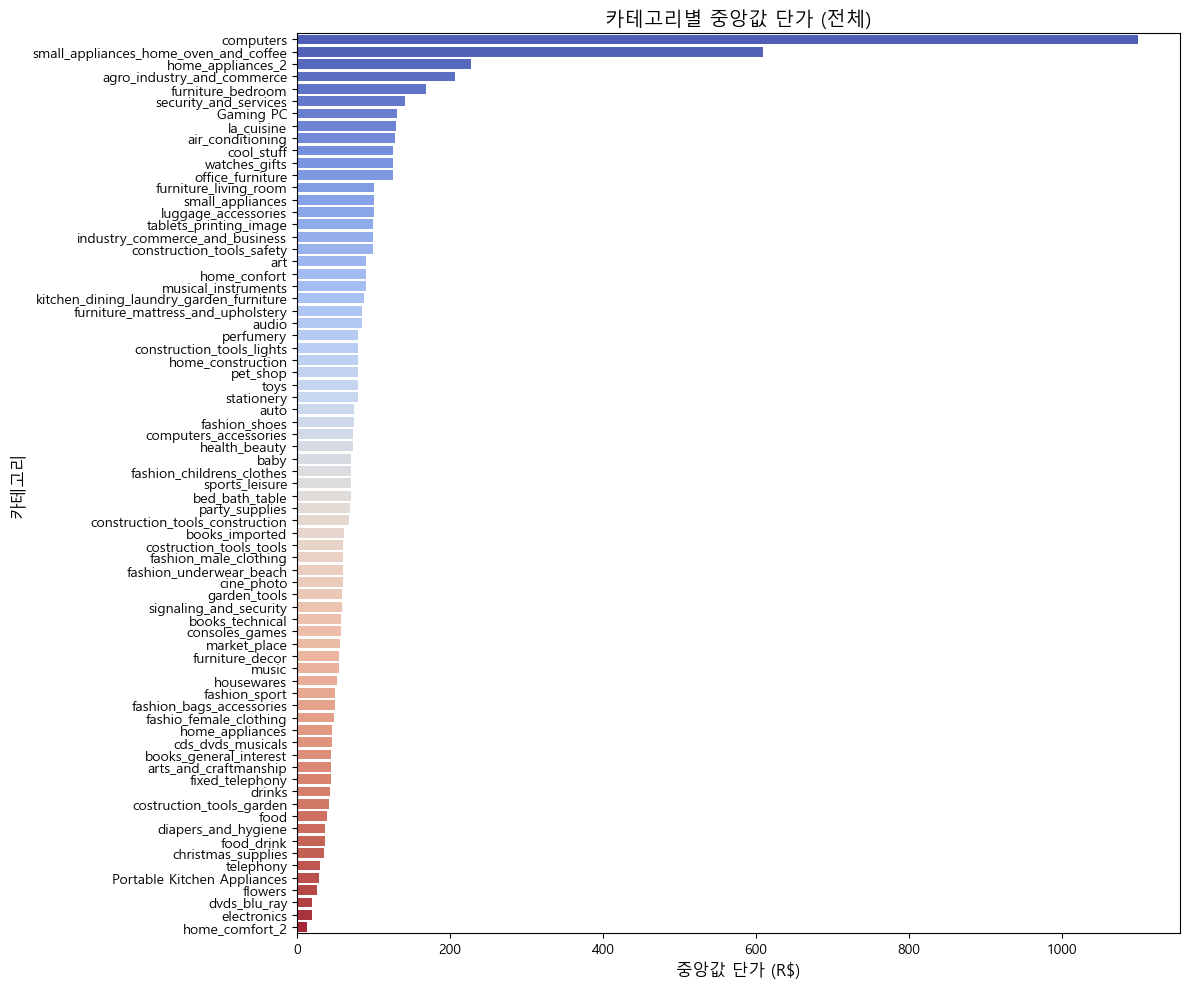

In [8]:
# 단가 계산 (단가는 이미 계산되어 있다면 생략 가능)
merge_df['unit_price'] = merge_df['price'] / merge_df['order_item_id']

# 카테고리별 중앙값 단가 계산
category_median_price = (
    merge_df
    .groupby('product_category_name_english')['unit_price']
    .median()
    .reset_index()
    .sort_values(by='unit_price', ascending=False)
)

# 수평 막대 그래프
plt.figure(figsize=(12, 10))  # 필요시 높이 늘리기
sns.barplot(
    data=category_median_price,
    y='product_category_name_english',
    x='unit_price',
    palette='coolwarm'
)

plt.title("카테고리별 중앙값 단가 (전체)", fontsize=14)
plt.xlabel("중앙값 단가 (R$)", fontsize=12)
plt.ylabel("카테고리", fontsize=12)
plt.tight_layout()
plt.show()


평균이 아닌 중앙값 기준으로 가격대를 판단하여 왜곡 없는 가격 포지셔닝을 파악하기 위해 분석한 자료입니다.    
일부 카테고리에서는 소수의 고가 상품이 평균 단가를 왜곡할 수 있기 때문에 중앙값이 더 안정적인 지표가 되는 경우도 있습니다.
신규 셀러가 진입 시 적정한 가격대 설정이나 시장 포지셔닝 전략 수립에 있어 핵심 기준이 될 수 있습니다.

하지만 위 지표를 확인시 상위권의 카테고리는 평균값과 많은 차이를 느낄 수는 없는것같습니다.
* 중앙값 단가가 높은 카테고리는 전반적으로 고가 시장일 가능성이 있다.
* 중앙값이 낮은 카테고리는 가격 경쟁이 심하거나 대중적인 소비재일 가능성이있다.
* 평균 단가와 중앙값 단가 간 격차가 큰 카테고리는 내부적으로 가격 편차가 심한 제품군이라고 볼 수 있습니다.

많은 카데고리 중앙값 단가 기준 상위 20개의 카테고리만 확인하여 상위값을 확인해보기 위해 시각화 하겠습니다.

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\4149603620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


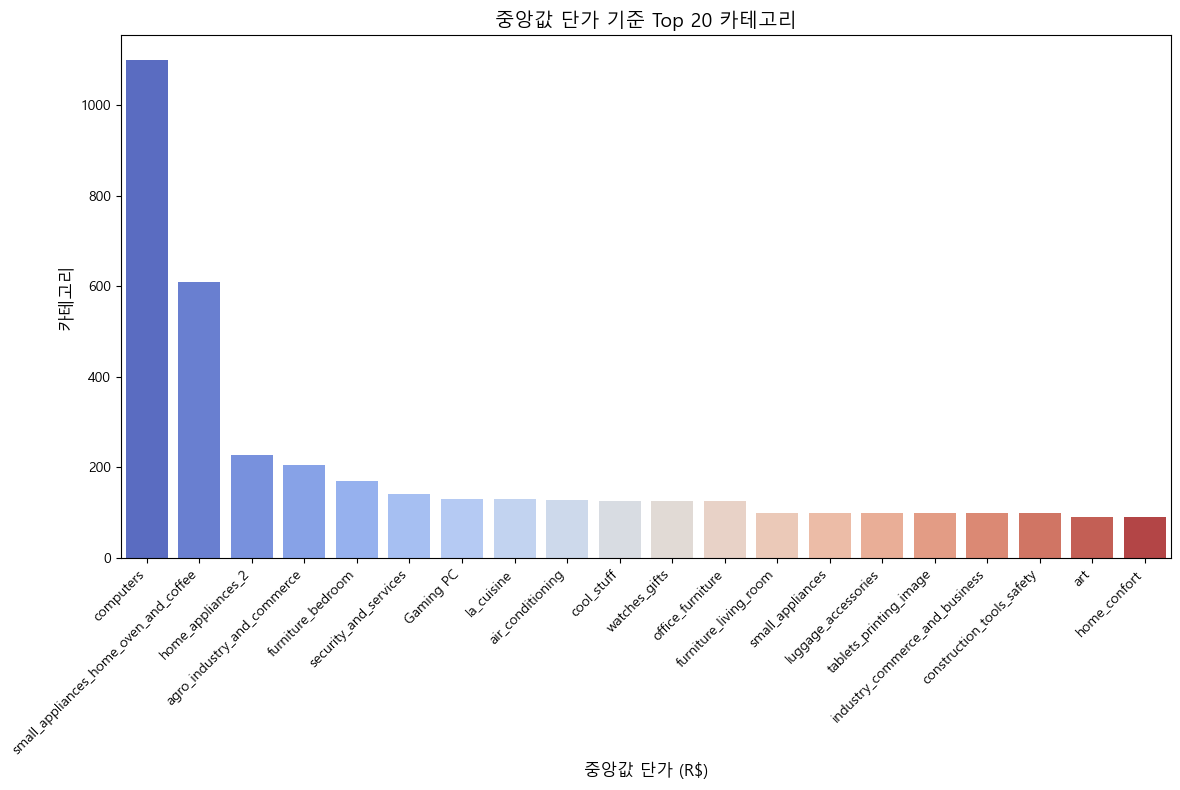

In [9]:
# 카테고리별 중앙값 단가 계산 + 상위 20개 추출
category_median_price_top20 = (
    merge_df
    .groupby('product_category_name_english')['unit_price']
    .median()
    .reset_index()
    .sort_values(by='unit_price', ascending=False)
    .head(20)  # 상위 20개만
)

# 수평 막대그래프
plt.figure(figsize=(12, 8))
sns.barplot(
    data=category_median_price_top20,
    x='product_category_name_english',
    y='unit_price',
    palette='coolwarm'
)

plt.title("중앙값 단가 기준 Top 20 카테고리", fontsize=14)
plt.xlabel("중앙값 단가 (R$)", fontsize=12)
plt.ylabel("카테고리", fontsize=12)

# x축 라벨을 대각선으로 회전
plt.xticks(rotation=45, ha='right', fontsize = 10)

plt.tight_layout()
plt.show()

## 3. 카테고리별 고유 상품 수 분석하기

In [10]:
# 고유 상품 수 계산
category_unique_products = (
    merge_df[['product_id', 'product_category_name_english']]
    .drop_duplicates()
    .groupby('product_category_name_english')
    .size()
    .reset_index(name='unique_product_count')
    .sort_values(by='unique_product_count', ascending=True)  # 막대 아래부터 쌓이게 정렬
)

# 2. 데이터프레임 형태로 출력
category_unique_products.head(20)  # 상위 20개만 출력 (전체 보고 싶으면 .head() 생략)

,product_category_name_english,unique_product_count
13,cds_dvds_musicals,1
0,Gaming PC,2
63,security_and_services,2
31,fashion_childrens_clothes,5
48,home_comfort_2,5
1,Portable Kitchen Appliances,9
69,tablets_printing_image,9
43,furniture_mattress_and_upholstery,10
54,la_cuisine,10
25,diapers_and_hygiene,11


* 위 상품들을 확인시 공급 다양성이 매우 낮은 카테고리들이 존재한다는것을 확인했습니다.
* 진입장벽이 낮을 수 있는 틈새시장 후보를 생각해볼 수 있었습니다. (fashion_childrens_clothes, home_comfort_2, la_cuisine, diapers_and_hygiene 카테고리 등)

C:\Users\nini\AppData\Local\Temp\ipykernel_11348\4024149021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


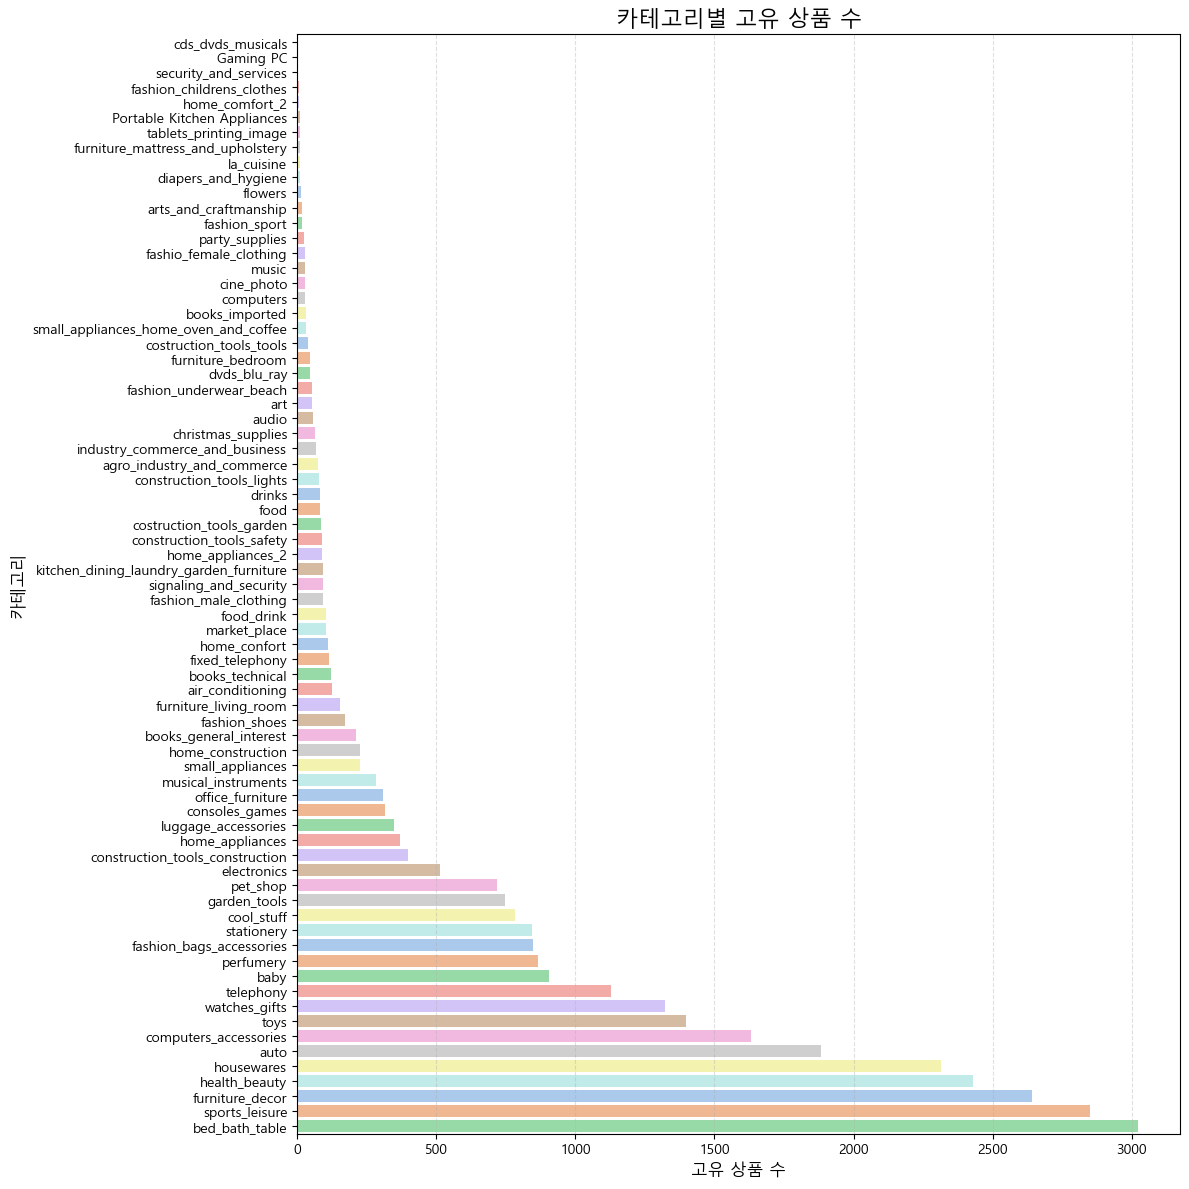

In [11]:
# 시각화
plt.figure(figsize=(12, 12))
sns.barplot(
    data=category_unique_products,
    x='unique_product_count',
    y='product_category_name_english',
    palette='pastel'
)

plt.title("카테고리별 고유 상품 수", fontsize=16)
plt.xlabel("고유 상품 수", fontsize=12)
plt.ylabel("카테고리", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* 막대가 짧은 카테고리는 제품군이 단조롭고 경쟁이 낮을 수 있어 신규 셀러 진입 유망 후보라고 판단할 수 있습니다.
* 막대가 긴 카테고리는 다양성이 풍부하지만, 경쟁도 심할 수 있습니다.
* 차후 제품 수 적음 + 매출 높음 조합을 확인해보면 블루오션으로 간주할 수 있다고 생각합니다.

# 4. 지역별 셀러 수 & 매출 파악

geolocation_state_seller 기준으로 고유셀러수 `nunique(seller_id)`, 총 거래금액 `sum(payment_value)`을 구하겠습니다.

In [12]:
# 지역별 셀러 수 & 매출 파악하기
region_summary = merge_df.groupby('geolocation_state_seller').agg({ # geolocation_state_seller를 기준으로 그룹화 한다. 뭐를?
    'seller_id': 'nunique', # 셀러들 위치의 셀러의 수
    'payment_value':'sum' # 셀러들 위치의 매출액
}).reset_index() # groupby를 하면 geolocation_state_seller가 인덱스로 들어감. 이를 빼주는게 reset_index()임.


region_summary = region_summary.rename(columns={
    'seller_id': 'unique_seller_count',
    'payment_value': 'total_payment_value'
})

# 셀러 수 기준 정렬 (적은 순)
low_seller = region_summary.sort_values('unique_seller_count').head(10)

# 거래 금액 기준 정렬 (많은 순)
high_sales = region_summary.sort_values('total_payment_value', ascending=False).head(10)


셀러 수 적은 지역 Top 10 vs 매출 높은 지역 Top 10으로 시각화를 진행하겠습니다.     
두 막대 그래프를 좌우로 비교하여 시장에서 과소공급된 지역 식별할 수 있습니다.

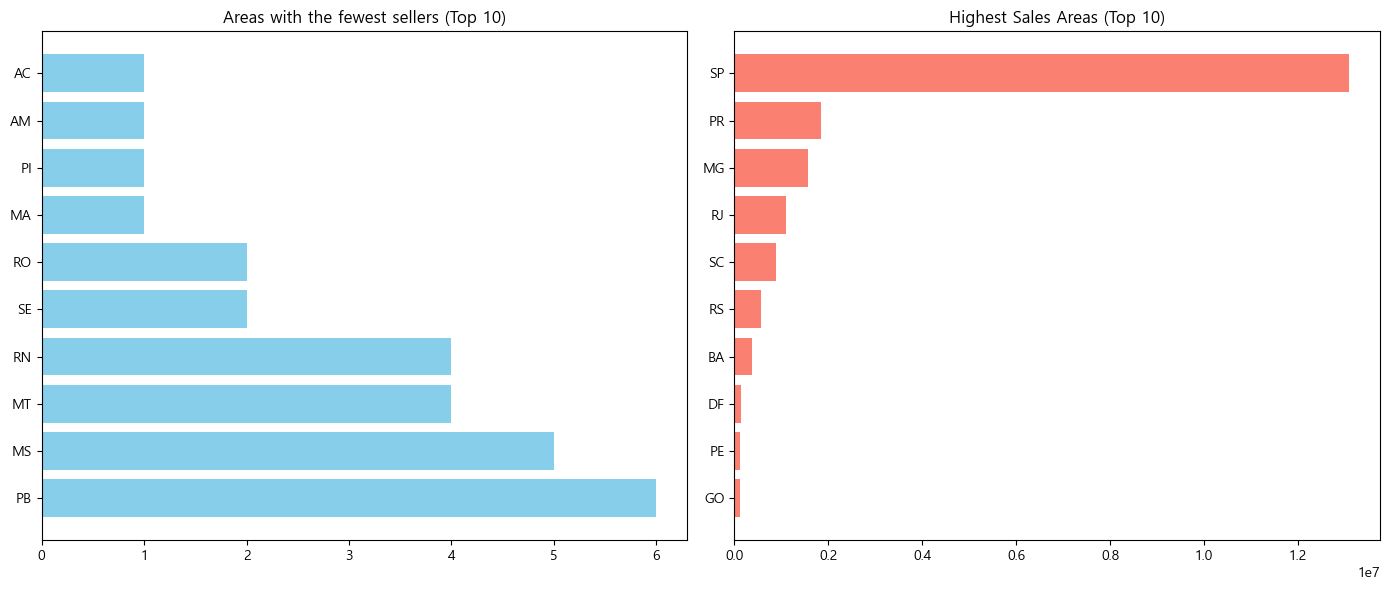

In [13]:
# 시각화
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# 왼쪽 - 셀러 수 적은 지역
ax[0].barh(low_seller['geolocation_state_seller'], low_seller['unique_seller_count'], color='skyblue')
ax[0].set_title('Areas with the fewest sellers (Top 10)')
ax[0].invert_yaxis()

# 오른쪽 - 매출 높은 지역
ax[1].barh(high_sales['geolocation_state_seller'], high_sales['total_payment_value'], color='salmon')
ax[1].set_title('Highest Sales Areas (Top 10)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

**왼쪽: 셀러 수가 적은 지역**
* AC, AM, PI, MA 등 북부 및 북동부 주 중심 해당 지역들은 판매자 공급이 거의 없는 수준이다.
* 물류 인프라가 부족하거나 진입장벽이 높거나 수요 부족에 기인할 수 있다 할 수 있습니다.
* 신규 셀러 유치나 지역 활성화 정책이 필요하다 판단됩니다.

**오른쪽: 매출이 높은 지역**
* sp가 압도적인 매출을 차치하고 있습니다.
* PR, MG, RJ, SC 등 남동부 주들이 매출 상위권으로 경제 규모가 크고 소비 수요가 높은 지역이라고 할 수 있습니다.

셀러 수가 적은 지역 중 일부는 실제로 높은 매출이 발생할 수 있는 잠재력을 가지고 있을 수 있어 공급부족 블루오션 후보라고 할 수 있습니다.    
반면 셀러 수는 많지만 매출이 낮은 지역이 있다면 경쟁만 치열하고 수익성이 낮은 레드오션 가능성이 있습니다.


# 5. 셀러당 평균 매출 계산

셀러 1명이 벌어들이는 평균 매출 기준으로 상위 지역 추출하여 실제 셀러 입장에서 가장 수익성이 높은 지역 순위를 도출하겠습니다.

Text(0.5, 0, 'Regions code')

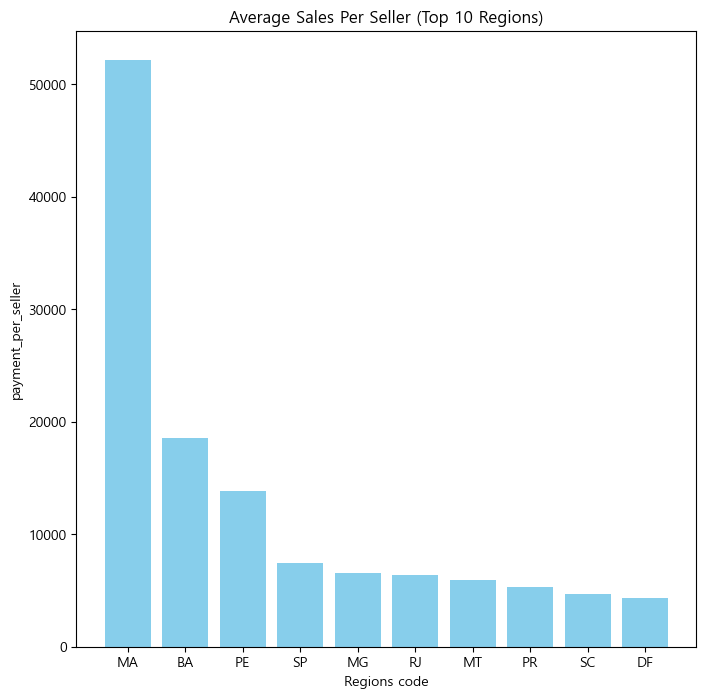

In [14]:
# 셀러당 평균 매출
region_summary['payment_per_seller'] = region_summary['total_payment_value'] / region_summary['unique_seller_count']

# 간단하게 셀러당 매출을 내림차순으로 10개만
top_blue_ocean = region_summary.sort_values('payment_per_seller', ascending=False).head(10)

# 시각화
f, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.bar(top_blue_ocean['geolocation_state_seller'], top_blue_ocean['payment_per_seller'], color='skyblue')
ax.set_title('Average Sales Per Seller (Top 10 Regions)')
ax.set_ylabel('payment_per_seller')
ax.set_xlabel('Regions code')

MA(마라냥) 주는 셀러 수는 적지만 1인당 매출이 압도적으로 높은것으로 확인됩니다.    
이는 진입 셀러 입장에서 가장 유리한 블루오션 후보라고 할 수 있습니다.    

SP, MG, RJ는 총 매출은 높지만 셀러 수가 많기 때문에 1인당 평균 매출은 낮은 편으로 레드오션 경향을 띄고 있다고 판단할 수 있습니다.

# 6. 시간 흐름에 따른 셀러 수 변화

다음은 블루오션 지역에 신규 셀러 유입이 늘고있는지 확인을 하기위해 시간 흐름에 따른 셀러수 변화를 확인하겠습니다.    
해당 지표로 경쟁 격화 가능성을 확인하고 여전히 진입이 가능한지에 대한 판단할 수 있는 지표를 확인할 수 있습니다.

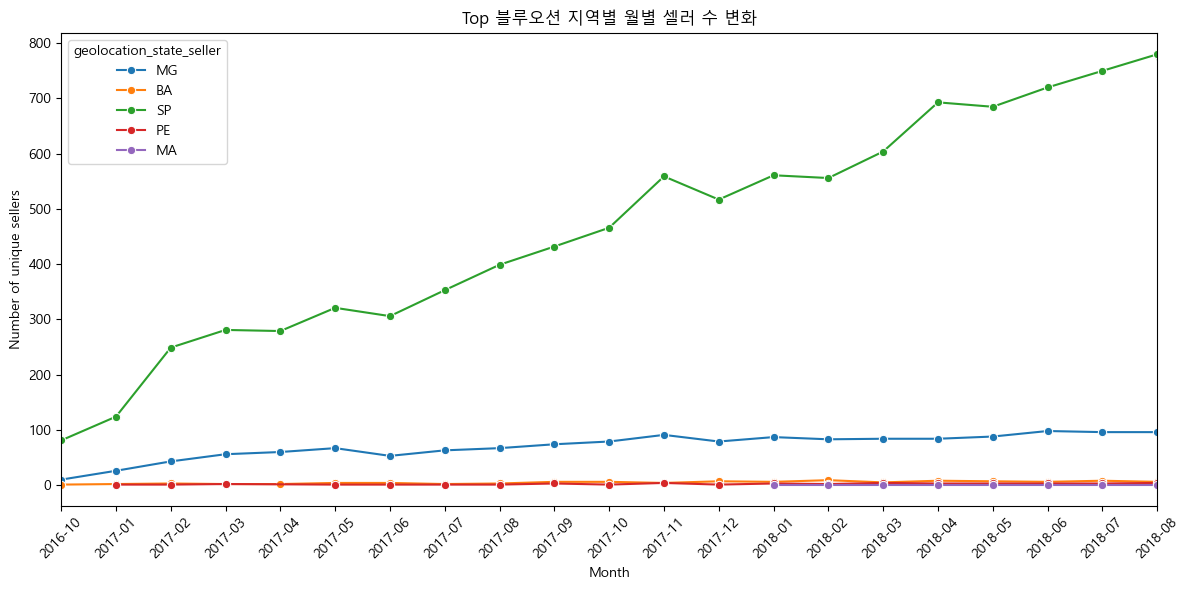

In [15]:
seller_month = merge_df[['geolocation_state_seller', 'seller_id', 'order_purchase_timestamp']].copy()

# 날짜를 월 단위(YYYY-MM)로 변환
seller_month['order_month'] = pd.to_datetime(seller_month['order_purchase_timestamp']).dt.to_period('M').astype(str)

# 월별-지역별 셀러 수
monthly_seller_count = (
    seller_month
    .groupby(['order_month', 'geolocation_state_seller'])['seller_id']
    .nunique()
    .reset_index(name='unique_seller_count')
)

# 아까 찾은 상위 n개 지역
top_states = top_blue_ocean['geolocation_state_seller'].head(5).tolist()

# 해당 지역만 필터링
selected = monthly_seller_count[monthly_seller_count['geolocation_state_seller'].isin(top_states)]

# 시각화
plt.figure(figsize=(12, 6))

sns.lineplot(data=selected, x='order_month', y='unique_seller_count', hue='geolocation_state_seller', marker='o')
plt.xticks(rotation=45)
plt.title('Top 블루오션 지역별 월별 셀러 수 변화')
plt.xlabel('Month')
plt.ylabel('Number of unique sellers')

plt.xlim(['2016-10', '2018-08'])  # x축 범위 설정
plt.tight_layout()
plt.show()

SP(상파울루): 전체적으로 셀러 수가 지속적으로 증가하고 있고 여전히 거래량이 많아 높은 총매출을 유지하고있습니다.    
MG, BA, PE, MA: 셀러 수가 낮은 수준에서 안정적으로 유지되고 있습니다.    
특히 **MA는 셀러 수가 매우 적은데 앞서 분석에서 셀러당 매출은 가장 높았으므로** 블루오션 후보라고 생각할 수 있습니다.     

* 셀러 수 증가 추세가 급격한 지역은 곧 경쟁이 심해질 가능성이 있습니다.
* 반대로 셀러 수가 장기간 낮게 유지되면서도 매출이 높은 지역은 공급자 측면에서 매우 유리하다고 볼 수 있습니다.

# 7. 시간 흐름에 따른 총 매출 변화
앞서 도출한 블루오션 지역들(MA, BA, PE, SP, MG) 에 대해,    
월별 총 매출의 시계열 추이를 분석함으로써 수익 구조가 계속 성장하고 있는지 또는 정체되고 있는지를 판단해보겠습니다.    
진입 시점과 시장 성숙도 판단에 활용할 수 있습니다.

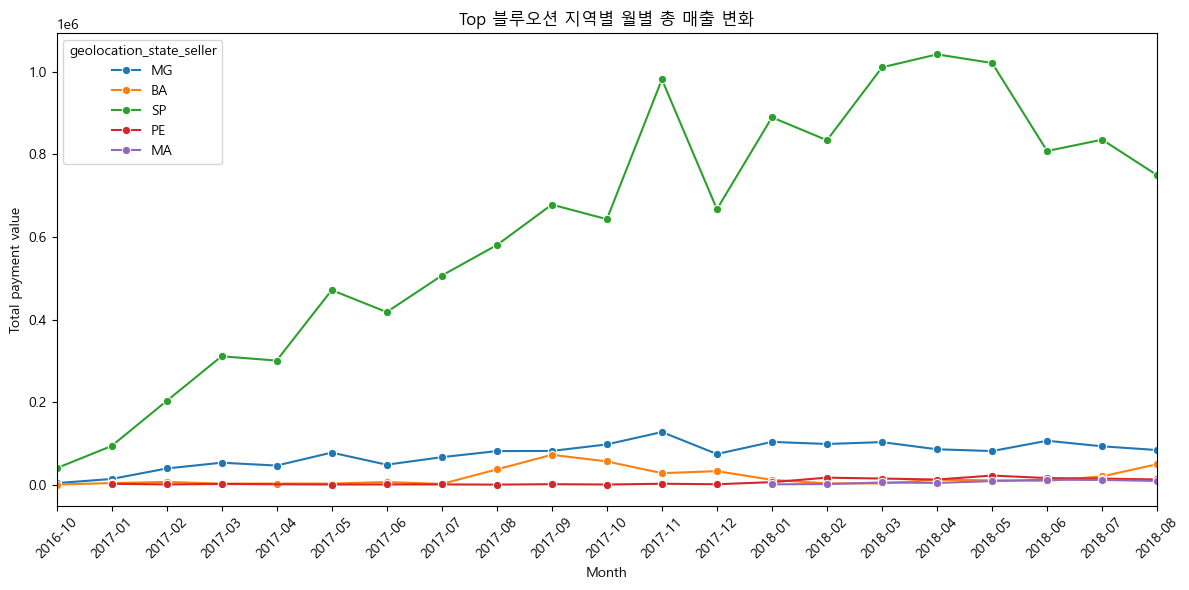

In [16]:
# 날짜 전처리

sales_month = merge_df[['geolocation_state_seller', 'order_purchase_timestamp', 'payment_value']].copy()
sales_month['order_month'] = pd.to_datetime(sales_month['order_purchase_timestamp']).dt.to_period('M').astype(str)


# 월별 지역별 총 매출 집계

monthly_sales = (
    sales_month
    .groupby(['order_month', 'geolocation_state_seller'])['payment_value']
    .sum()
    .reset_index(name='total_payment_value')
)

# 상위 n개 지역
top_states = top_blue_ocean['geolocation_state_seller'].head(5).tolist()

# 이전에 선택했던 블루오션 지역 n개 필터링
selected_sales = monthly_sales[monthly_sales['geolocation_state_seller'].isin(top_states)]


#  시각화 (선 그래프)

plt.figure(figsize=(12, 6))

sns.lineplot(data=selected_sales, x='order_month', y='total_payment_value',
             hue='geolocation_state_seller', marker='o')

plt.xticks(rotation=45)
plt.title('Top 블루오션 지역별 월별 총 매출 변화')
plt.xlabel('Month')
plt.ylabel('Total payment value')
plt.xlim(['2016-10', '2018-08'])
plt.tight_layout()
plt.show()

* SP(상파울루): 여전히 전체 매출 규모에서 가장 압도적인 지역이며, 시간이 지날수록 매출이 꾸준히 증가함.
* MG, BA는 중간 수준의 매출 유지. 특히 MG는 완만하게 증가 중.
* MA, PE는 상대적으로 총매출 규모는 낮지만, 일부 구간에서 완만한 상승세를 보임.
* MA는 앞서 payment_per_seller가 가장 높았던 주(state)로 소수 셀러가 큰 매출을 올리고 있는 구조로 해석 할 수 있습니다.
    
결과적으로 SP는 매출/셀러 수 모두 증가 중이고 포화되었지만 여전히 수익성 높은 시장이라고 할 수 있습니다.    
MA는 매출 규모는 작지만 셀러 수가 거의 일정하다는건 경쟁 없이 수익 가능한 구조를 유지중이라고 할 수 있습니다.    
총 매출과 셀러 수 증가 간의 불균형을 보면 일부 지역은 거래는 늘어나도 셀러 수는 늘지 않는 구조로    
기존 셀러 독점 시장일 가능성으로 신규 진입시 틈새 공랴기 필요할 수 있다고 볼 수 있습니다.

# 8. 월별 셀러당 평균 매출 변화
* 지역별 셀러당 평균 매출(Payment per seller)의 시간 흐름을 분석하여 블루오션으로 보였던 지역이 실제로 시간이 지나도 수익성이 유지되었는지 확인
* 셀러 수가 증가함에도 1인당 매출이 유지/증가하면 블루오션 하지만 매출이 감소하면 포화 또는 수익 악화 신호로 해석 가능합니다.

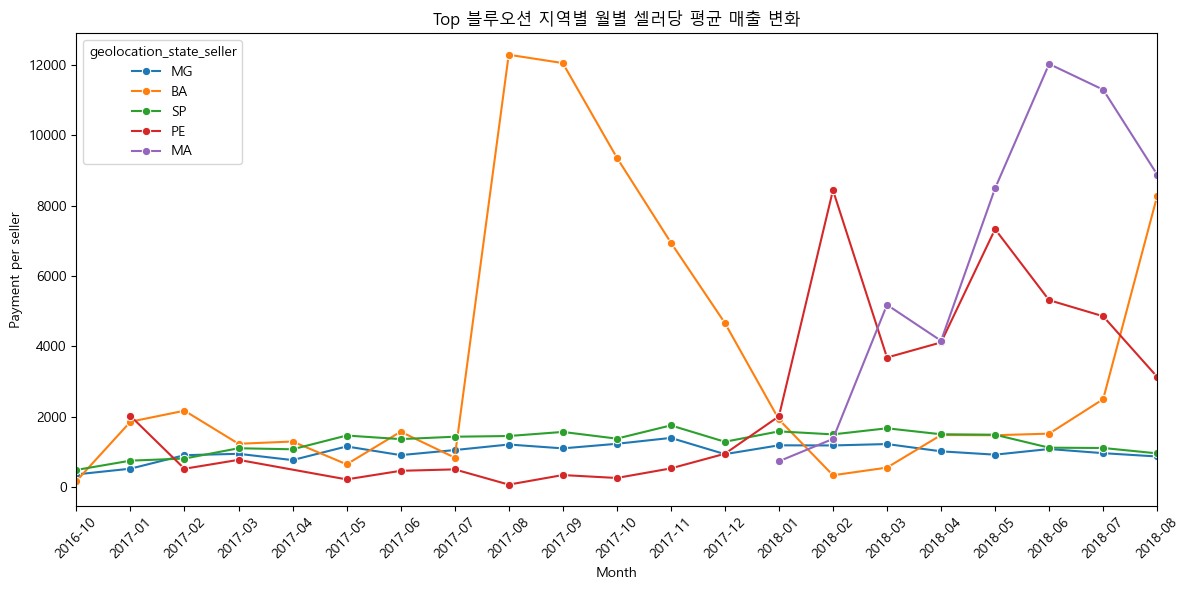

In [17]:
# 월별 지역별 셀러당 평균 매출 변화

# 두 테이블 합치기
seller_sales = pd.merge(
    monthly_seller_count,
    monthly_sales,
    on=['order_month', 'geolocation_state_seller'],
    how='inner'
)

# 평균 매출 컬럼 생성
seller_sales['payment_per_seller'] = seller_sales['total_payment_value'] / seller_sales['unique_seller_count']

# 상위 블루오션 지역만 필터링
selected_ratio = seller_sales[seller_sales['geolocation_state_seller'].isin(top_states)]

# 시각화
plt.figure(figsize=(12, 6))

sns.lineplot(data=selected_ratio, x='order_month', y='payment_per_seller',
             hue='geolocation_state_seller', marker='o')

plt.xticks(rotation=45)
plt.title('Top 블루오션 지역별 월별 셀러당 평균 매출 변화')
plt.xlabel('Month')
plt.ylabel('Payment per seller')
plt.xlim(['2016-10', '2018-08'])
plt.tight_layout()
plt.show()

* BA: 2017년 중반 ~ 하반기까지 셀러당 매출이 높았지만 이후 급격히 하락으로 초기 기회가 있었지만 경쟁 심화로 블루오션에서 레드오션화 되었다고 할 수 있습니다.
* MA: 2018년 들어 급격히 증가한 모습으로 최근에 강하게 부상한 신흥 블루오션이라 판단할 수 있습니다.
* SP, MG: 전체적으로 안정적이지만 평탄한 흐름으로 포화된 안정시장으로 신규 진입시 마진 기대가 낮다고 할 수 있습니다.
* PE: 2018년 들어 다소 들쑥날쑥한 흐름으로 수익성이 불안정하고 마케팅/브랜드 의존도 가능성이 있다고 할 수 있습니다.

**결론**

**MA** : 신규 셀러 진입 시 수익성 높은 **진짜 블루오션** 후보     
**BA** : 기회는 있었으나 이미 진입자가 늘면서 수익성 **급감**  
**SP** : **매출은 많지만 1인당 효율은 낮은 경쟁 시장**     
**PE** : 수익성이 일정치 않아 **불확실성 높은 시장**       


# 9. 어떤 제품 카테고리가 경쟁이 덜 심한가? (판매의 기회가 더 많을까?)
**분석 목적**
1. 제품 카테고리별로 **고유 셀러 수(경쟁자 수)** 를 기준으로 사분위수(Q1, Q3)를 나누고 이를 바탕으로 시장 경쟁 강도를 정량적으로 분류
2. 셀러 수가 적은 카테고리는 경쟁이 적고, 진입 시 시장 선점 가능성이 높은 블루오션으로 간주
3. 반대로 셀러 수가 많은 카테고리는 진입 시 경쟁이 치열하고 마진 압박이 클 수 있음
    
- 전체 판매하는 모든 제품 카테고리별 셀러수 중 상위 25% 이상은 레드오션 (해당 제품 카테고리에 많은 수의 셀러가 판매 중)
- 전체 판매하는 모든 제품 카테고리별 셀러수 중 하위 25% 이하는 블루오션 (해당 제품 카테고리에 적은 수의 셀러가 판매 중)

In [18]:
# 카테고리별 고유 판매자 수 계산
cat_seller_counts = merge_df.groupby('product_category_name_english')['seller_id'].nunique().reset_index()
cat_seller_counts.columns = ['product_category', 'unique_seller_count']

# 사분위수 계산 (25%, 75%)
Q1 = cat_seller_counts['unique_seller_count'].quantile(0.25)
Q3 = cat_seller_counts['unique_seller_count'].quantile(0.75)

# 블루오션 / 레드오션 / 중간 시장 분류
def classify_ocean(seller_count):
    if seller_count <= Q1:
        return 'Blue Ocean'   # 경쟁 적음
    elif seller_count >= Q3:
        return 'Red Ocean'    # 경쟁 치열
    else:
        return 'Middle Market'  # 보통

cat_seller_counts['market_type'] = cat_seller_counts['unique_seller_count'].apply(classify_ocean)

# 결과 출력
print(cat_seller_counts.sort_values(by='unique_seller_count', ascending=False))

# 블루오션만 정리
blue_ocean_df = cat_seller_counts[cat_seller_counts['market_type'] == 'Blue Ocean']

blue_ocean_df.sort_values(by=['unique_seller_count'], ascending=[False])

         product_category  unique_seller_count market_type
45          health_beauty                  489   Red Ocean
67         sports_leisure                  477   Red Ocean
51             housewares                  463   Red Ocean
7                    auto                  374   Red Ocean
41        furniture_decor                  366   Red Ocean
..                    ...                  ...         ...
37                flowers                    3  Blue Ocean
63  security_and_services                    2  Blue Ocean
54             la_cuisine                    2  Blue Ocean
0               Gaming PC                    2  Blue Ocean
13      cds_dvds_musicals                    1  Blue Ocean

[73 rows x 3 columns]


,product_category,unique_seller_count,market_type
32,fashion_male_clothing,13,Blue Ocean
33,fashion_shoes,13,Blue Ocean
5,arts_and_craftmanship,13,Blue Ocean
60,party_supplies,12,Blue Ocean
29,fashio_female_clothing,11,Blue Ocean
27,dvds_blu_ray,10,Blue Ocean
34,fashion_sport,10,Blue Ocean
16,computers,9,Blue Ocean
35,fashion_underwear_beach,9,Blue Ocean
11,books_imported,7,Blue Ocean


* Blue Ocean 카테고리는 진입 시 상대적으로 적은 경쟁에 직면할 가능성이 크고 차별화된 상품 기획 또는 브랜딩으로 빠른 시장 선점 가능
* Red Ocean 카테고리는 이미 셀러가 다수 존재하고 가격 경쟁/후기 경쟁/마케팅 경쟁이 치열할 가능성 높음

# 10. 어느 곳이 경쟁이 덜 심한가? (판매의 기회가 더 많을까?)
**분석 목적**    
이 분석은 지역별로 고유 셀러 수를 기준으로 시장을 분류하고 그중에서도 수요 상위 25%에 속하는 블루오션 지역만 선별하는 전략적 필터링을 수행.

- 전체 판매하는 모든 지역별 셀러수 중 상위 25% 이상은 레드오션 (해당 지역에 많은 수의 셀러가 판매 중)
- 전체 판매하는 모든 지역별 셀러수 중 하위 25% 이하는 블루오션 (해당 지역에 적은 수의 셀러가 판매 중)

In [19]:
# 셀러 수 적고 수요는 높은 고수익 시장 식별

# 지역별 고유 판매자 수 계산
region_seller_counts = merge_df.groupby('seller_city')['seller_id'].nunique().reset_index()
region_seller_counts.columns = ['region', 'unique_seller_count']

# 지역별 주문 수 계산
region_order_counts = merge_df.groupby('seller_city')['order_id'].nunique().reset_index()
region_order_counts.columns = ['region', 'order_count']

# 병합
region_market_info = pd.merge(region_seller_counts, region_order_counts, on='region')

# 사분위수 계산 (판매자 수 기준)
Q1 = region_market_info['unique_seller_count'].quantile(0.25)
Q3 = region_market_info['unique_seller_count'].quantile(0.75)

# 시장 유형 분류 함수
def classify_market(count):
    if count <= Q1:
        return 'Blue Ocean'
    elif count >= Q3:
        return 'Red Ocean'
    else:
        return 'Middle Market'

region_market_info['market_type'] = region_market_info['unique_seller_count'].apply(classify_market)

# 수요 기준 상위 25% 계산
Q3_orders = region_market_info['order_count'].quantile(0.75)

# 수요 많은 블루오션 필터링
high_demand_blue_ocean_region = region_market_info[
    (region_market_info['market_type'] == 'Blue Ocean') &
    (region_market_info['order_count'] >= Q3_orders)
]

# 결과 출력
print("수요 많은 블루오션 지역:")
high_demand_blue_ocean_region.sort_values(by='order_count', ascending=False)


수요 많은 블루오션 지역:


,region,unique_seller_count,order_count,market_type
215,guariba,1,1131,Blue Ocean
228,ilicinea,1,715,Blue Ocean
501,sao luis,1,392,Blue Ocean
433,riberao preto,1,253,Blue Ocean
339,monte siao,1,247,Blue Ocean
211,guara,1,240,Blue Ocean
166,dracena,1,228,Blue Ocean
586,vicente de carvalho,1,174,Blue Ocean
401,pirituba,1,153,Blue Ocean
404,poa,1,138,Blue Ocean


* guariba, ilicinea, sao luis 등은 모두 단 1명의 셀러가 200~1000건이 넘는 주문을 처리하고    
  있는것을 확인할 수 있고 이는 강력한 독점 구조 또는 전무한 경쟁 상태라고 할 수 있습니다.
* 이는 신규 셀러가 진입만 하면 바로 수요를 나눠가질 수 있는 강력한 기회 시장의 지표라고 할 수 있습니다.
* sao luis는 브라질 북동부 대도시로 지역 구매력 대비 셀러가 매우 부족하다는 구조적 신호일 수도 있습니다.
    
**결과**    
- 해당 지역을 신규 셀러 유치 우선 타깃으로 설정할 수 있습니다.

# 11. 어느 곳에 어떤 제품을 판매를 해야 가장 성공 가능성이 높을까?
**분석 목적**
* 브라질 전역의 우편번호(지역) + 카테고리 단위로 시장을 나누고 각각의 고유 셀러 수와 주문 수를 집계하여 초미세 시장 단위의 블루오션 탐색
* 셀러 수는 적지만 주문 수는 많은 조합을 찾아 신규 진입자에게 가장 유리한 기회를 제공하는 것이 목적
* 블루오션 지역  블루오션 제품 카테고리 교집합에서 수요가 상위 25%에 해당되는 지역

In [20]:
# 1. 우편번호 + 카테고리 기준으로 고유 판매자 수 계산
zip_seller_counts = merge_df.groupby(['seller_zip_code_prefix', 'product_category_name_english'])['seller_id'].nunique().reset_index()
zip_seller_counts.columns = ['zipcode', 'category', 'unique_seller_count']



# 2. 우편번호 + 카테고리 기준 주문 수 계산
zip_order_counts = merge_df.groupby(['seller_zip_code_prefix', 'product_category_name_english'])['order_id'].nunique().reset_index()
zip_order_counts.columns = ['zipcode', 'category', 'order_count']

# 3. 병합
zip_market = pd.merge(zip_seller_counts, zip_order_counts, on=['zipcode', 'category'])

zip_market['zipcode'] = zip_market['zipcode'].astype(str).str.zfill(5)

# 4. 판매자 수 기준 사분위수 계산
Q1_zip = zip_market['unique_seller_count'].quantile(0.25)
Q3_zip = zip_market['unique_seller_count'].quantile(0.75)

# 5. 시장 유형 분류
def classify_market(count):
    if count <= Q1_zip:
        return 'Blue Ocean'
    elif count >= Q3_zip:
        return 'Red Ocean'
    else:
        return 'Middle Market'

zip_market['market_type'] = zip_market['unique_seller_count'].apply(classify_market)

# 6. 수요 기준 상위 25% 계산
Q3_zip_orders = zip_market['order_count'].quantile(0.75)

# 7. 수요 많은 블루오션 필터링
# high_demand_blue_ocean_zip =
zip_market[
    (zip_market['market_type'] == 'Blue Ocean') &
    (zip_market['order_count'] >= Q3_zip_orders)
]

,zipcode,category,unique_seller_count,order_count,market_type
0,01001,fashion_bags_accessories,1,17,Blue Ocean
3,01021,cool_stuff,1,19,Blue Ocean
14,01026,audio,1,93,Blue Ocean
24,01026,housewares,1,31,Blue Ocean
26,01026,perfumery,1,19,Blue Ocean
...,...,...,...,...,...
5872,96203,garden_tools,1,14,Blue Ocean
5886,98803,cool_stuff,1,30,Blue Ocean
5887,98803,health_beauty,1,11,Blue Ocean
5888,98803,small_appliances,1,17,Blue Ocean


이 조합은 **“지역 기반 + 상품 카테고리 기반 독점 기회”** 를 보여주고 있습니다.    
경쟁이 거의 없어 신규 셀러 입장에서 매우 유리한 구조입니다.    
일부 지역은 특정 카테고리에서만 수요가 높기 때문에 세분화된 맞춤 진입 전략이 필요합니다.    
특히 01026, 99500 등은 서울시나 대도시 수준의 우편번호 구조일 가능성도 있어 로컬 니즈 대응형 진입이 가능하다고 할 수 있습니다.    

* zipcode + category 조합을 기반으로 한 신규 셀러 진입 추천 리스트 자동 생성 가능하도록 활용을 해볼 수 있습니다.
* 지도 기반으로 시각화하면 지역별 블루오션 밀집 구간 파악 가능합니다.

# 12. 블루오션 지역 블루오션 제품 카테고리 시각화
블루오션 지역  블루오션 제품 카테고리 교집합에서 수요가 상위 25%에 해당되는 지역을 시각화하였습니다.

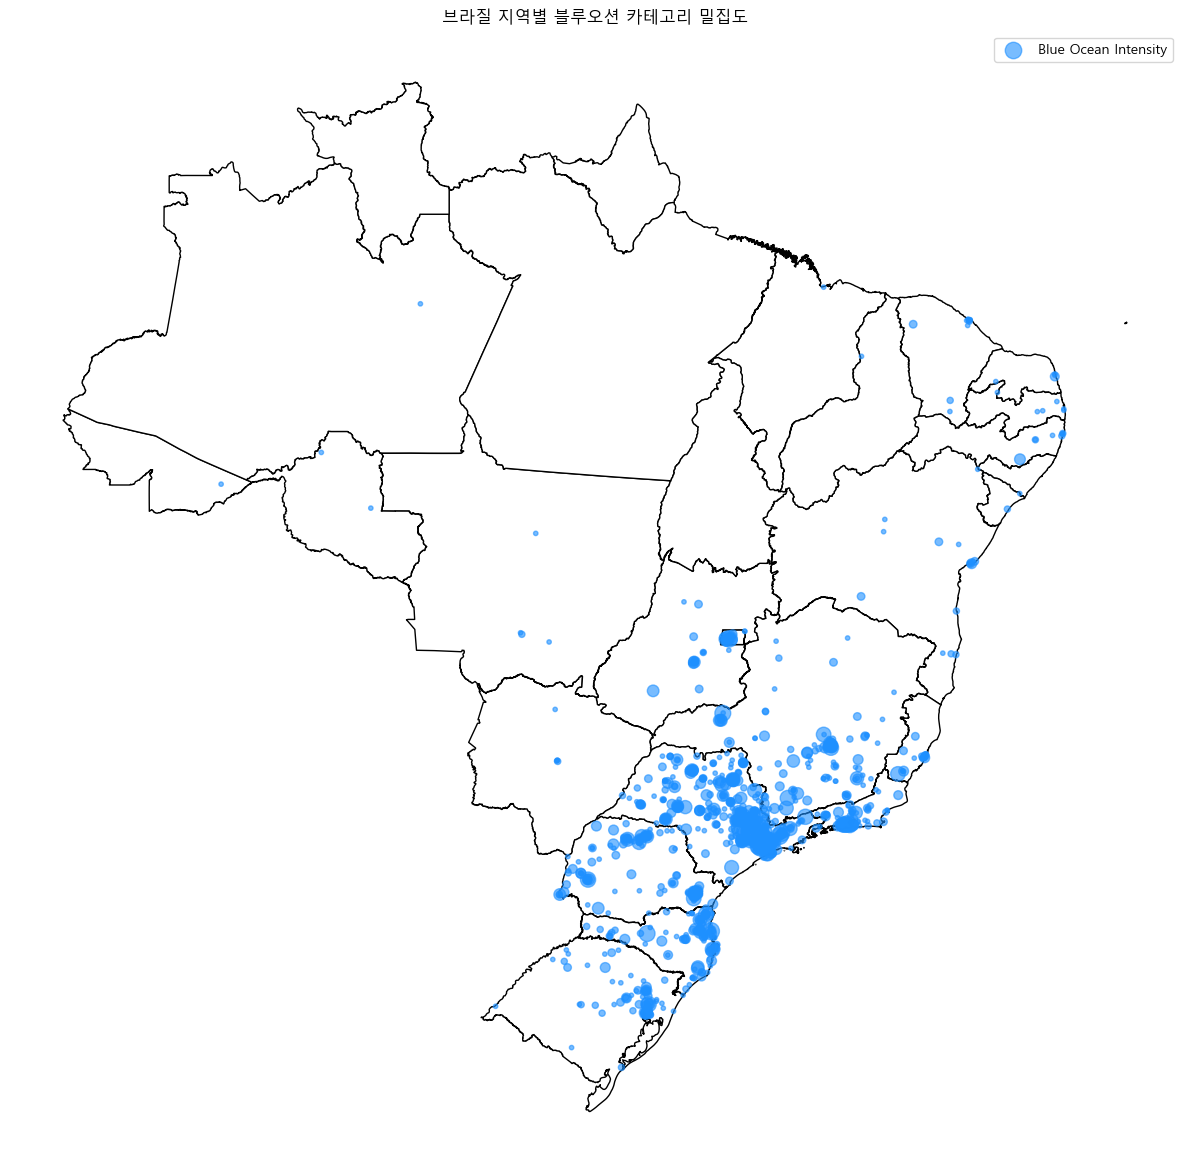

In [21]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# 1. 블루오션 카테고리 수 기준 집계
zip_blue_counts = (
    zip_market[zip_market['market_type'] == 'Blue Ocean']
    .groupby('zipcode')
    .size()
    .reset_index(name='blue_ocean_category_count')
)

# 2. zip 좌표 평균 (geolocation에서)
geo_coords = (
    geolocation
    .copy()
    .assign(zipcode=geolocation['geolocation_zip_code_prefix'].astype(str).str.zfill(5))
    .groupby('zipcode')[['geolocation_lat', 'geolocation_lng']]
    .mean()
    .reset_index()
)

# 3. 병합
map_data = pd.merge(zip_blue_counts, geo_coords, on='zipcode', how='inner')

# 4. 시각화
import geopandas as gpd
import matplotlib.pyplot as plt

# 브라질 주 GeoJSON 불러오기
brazil_states = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

fig, ax = plt.subplots(figsize=(12, 12))
brazil_states.plot(ax=ax, color='white', edgecolor='black')

# 점 찍기 (블루오션 카테고리 수를 점 크기로)
scatter = ax.scatter(
    map_data['geolocation_lng'], map_data['geolocation_lat'],
    s=map_data['blue_ocean_category_count'] * 10,  # 점 크기
    color='dodgerblue', alpha=0.6, label='Blue Ocean Intensity'
)

plt.title("브라질 지역별 블루오션 카테고리 밀집도")
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()


In [25]:
# 레드오션 산점도
# 1. 우편번호 + 카테고리 기준으로 고유 판매자 수 계산
zip_seller_counts = merge_df.groupby(['seller_zip_code_prefix', 'product_category_name_english'])['seller_id'].nunique().reset_index()
zip_seller_counts.columns = ['zipcode', 'category', 'unique_seller_count']


# 2. 우편번호 + 카테고리 기준 주문 수 계산
zip_order_counts = merge_df.groupby(['seller_zip_code_prefix', 'product_category_name_english'])['order_id'].nunique().reset_index()
zip_order_counts.columns = ['zipcode', 'category', 'order_count']

# 3. 병합
zip_market = pd.merge(zip_seller_counts, zip_order_counts, on=['zipcode', 'category'])

zip_market['zipcode'] = zip_market['zipcode'].astype(str).str.zfill(5)

# 4. 판매자 수 기준 사분위수 계산
Q1_zip = zip_market['unique_seller_count'].quantile(0.25)
Q3_zip = zip_market['unique_seller_count'].quantile(0.75)

# 5. 시장 유형 분류
def classify_market(count):
    if count <= Q1_zip:
        return 'Blue Ocean'
    elif count >= Q3_zip:
        return 'Red Ocean'
    else:
        return 'Middle Market'

zip_market['market_type'] = zip_market['unique_seller_count'].apply(classify_market)

# 6. 수요 기준 상위 25% 계산
Q3_zip_orders = zip_market['order_count'].quantile(0.75)

# 7. 수요 많은 블루오션 필터링
# high_demand_blue_ocean_zip =
zip_market[
    (zip_market['market_type'] == 'Red Ocean') &
    (zip_market['order_count'] >= Q3_zip_orders)
]

,zipcode,category,unique_seller_count,order_count,market_type
17,01026,computers_accessories,4,16,Red Ocean
21,01026,electronics,3,26,Red Ocean
27,01026,telephony,2,43,Red Ocean
85,01212,computers_accessories,2,11,Red Ocean
163,01319,sports_leisure,2,12,Red Ocean
...,...,...,...,...,...
5641,89560,auto,2,92,Red Ocean
5688,90230,computers_accessories,2,252,Red Ocean
5776,93608,sports_leisure,2,10,Red Ocean
5797,95012,housewares,2,16,Red Ocean


In [26]:
# 1. 레드오션 필터링
high_demand_red_ocean_zip = zip_market[
    (zip_market['market_type'] == 'Red Ocean') &
    (zip_market['order_count'] >= Q3_zip_orders)
]

# 2. geolocation에서 zip 좌표 평균 구하기
geo_coords = (
    geolocation
    .copy()
    .assign(zipcode=geolocation['geolocation_zip_code_prefix'].astype(str).str.zfill(5))
    .groupby('zipcode')[['geolocation_lat', 'geolocation_lng']]
    .mean()
    .reset_index()
)

# 3. 병합 (좌표 추가)
red_ocean_map = pd.merge(high_demand_red_ocean_zip, geo_coords, on='zipcode', how='inner')


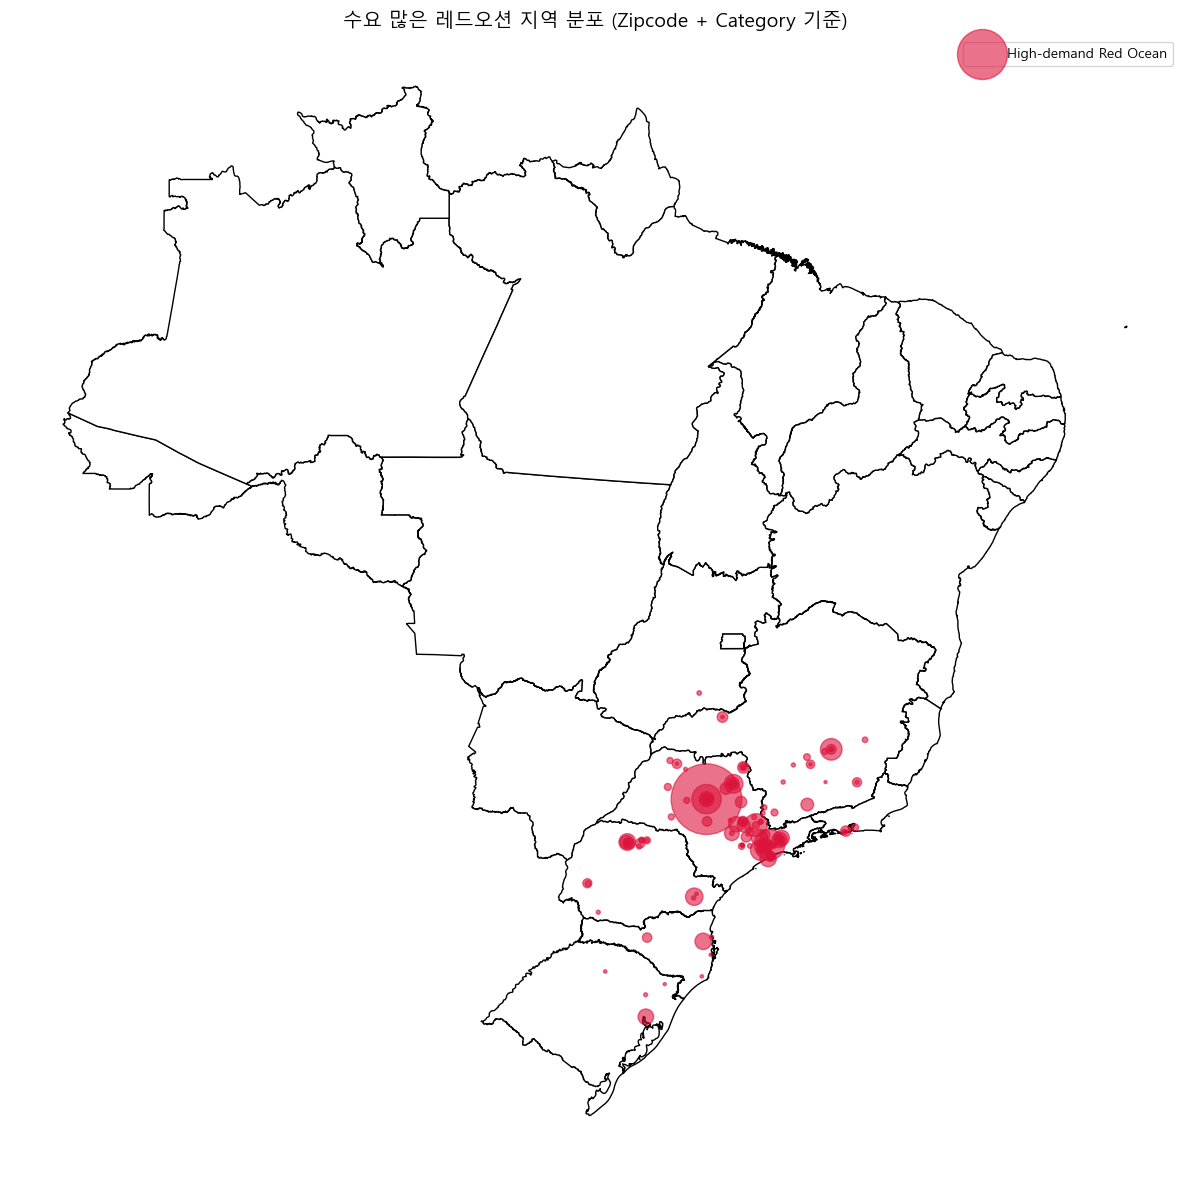

In [30]:
# 시각화
fig, ax = plt.subplots(figsize=(12, 12))
brazil_states.plot(ax=ax, color='white', edgecolor='black')

# 산점도: 주문 수(order_count)를 점 크기로 표현
scatter = ax.scatter(
    red_ocean_map['geolocation_lng'],
    red_ocean_map['geolocation_lat'],
    s=red_ocean_map['order_count'] * 0.5,  # 점 크기 조정
    c='crimson',
    alpha=0.6,
    label='High-demand Red Ocean'
)

plt.title("수요 많은 레드오션 지역 분포 (Zipcode + Category 기준)", fontsize=14)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


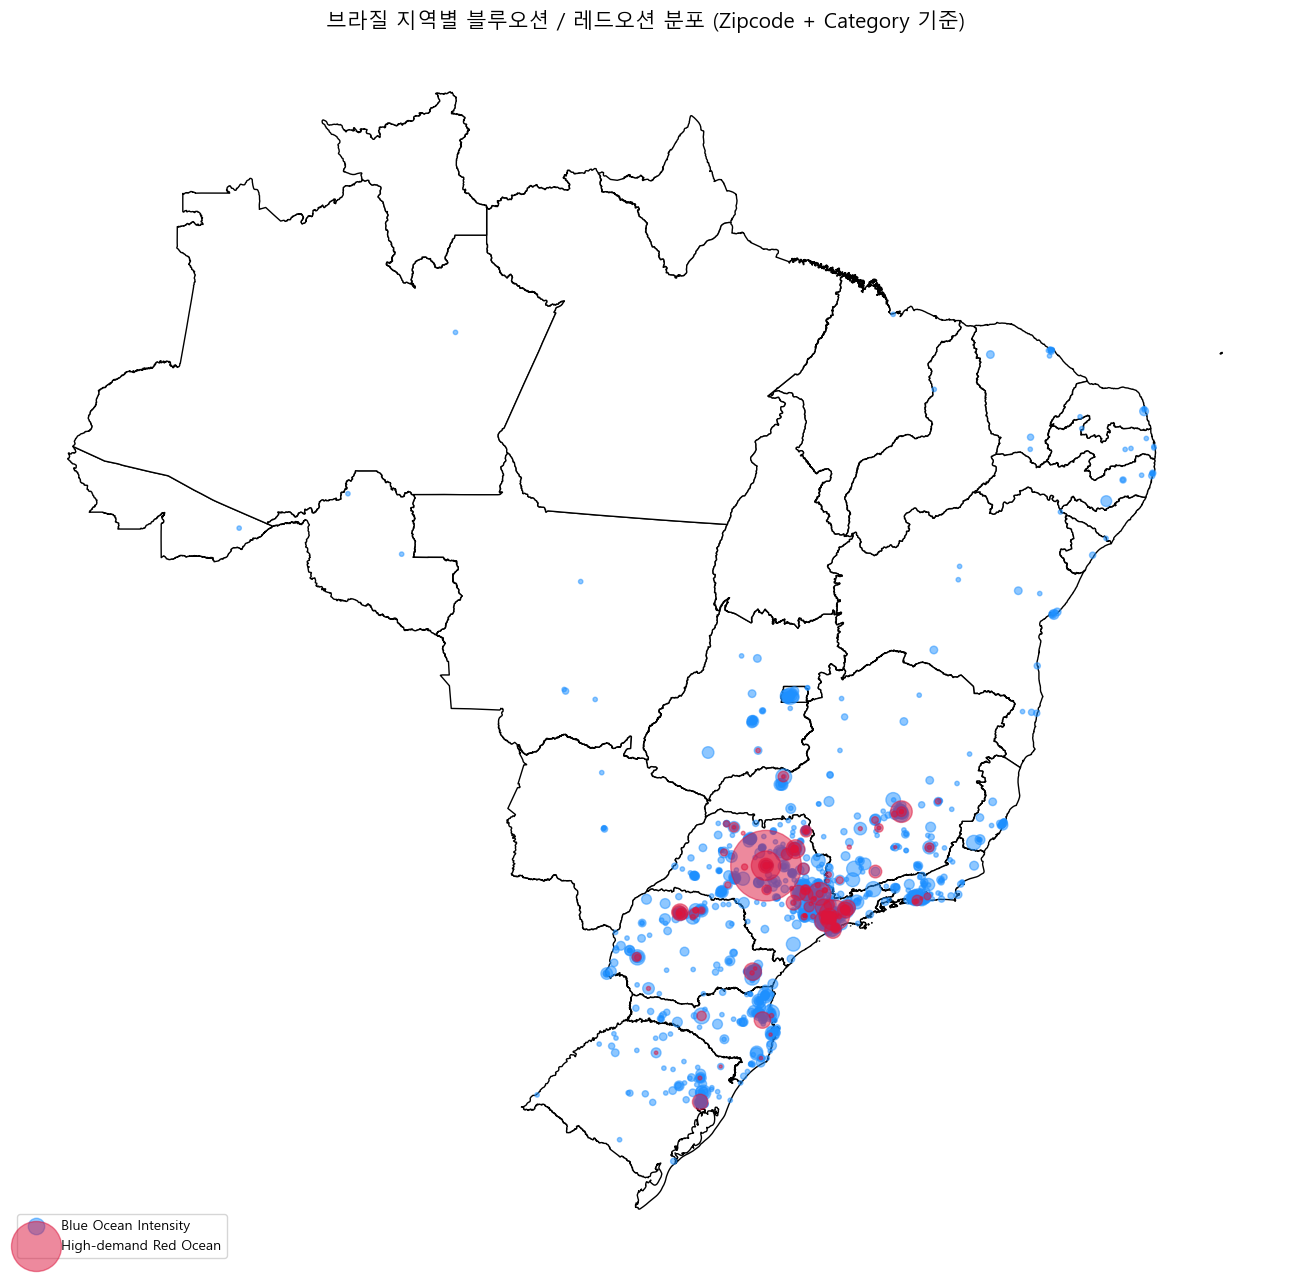

In [35]:
# 레드오션 / 블루오션 지도 산점도 합치기

# 지도 시각화
fig, ax = plt.subplots(figsize=(13, 13))
brazil_states.plot(ax=ax, color='white', edgecolor='black')

# 1. 블루오션 산점도 (카테고리 수 기준)
ax.scatter(
    map_data['geolocation_lng'], map_data['geolocation_lat'],
    s=map_data['blue_ocean_category_count'] * 10,
    color='dodgerblue', alpha=0.5, label='Blue Ocean Intensity'
)

# 2. 레드오션 산점도 (주문 수 기준)
ax.scatter(
    red_ocean_map['geolocation_lng'], red_ocean_map['geolocation_lat'],
    s=red_ocean_map['order_count'] * 0.5,
    color='crimson', alpha=0.5, label='High-demand Red Ocean'
)

# 제목 및 설정
plt.title("브라질 지역별 블루오션 / 레드오션 분포 (Zipcode + Category 기준)", fontsize=15)
plt.axis('off')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
